In [1]:
# Library for accessing the tweets can learn more about it in the tweepy documentation
# tweepy documentation link : https://docs.tweepy.org/en/stable/
import tweepy


In [2]:
#from twitter developer account accessing the twitter getting the access keys and API key
consumer_key = '1pbe24Jk5mC7n2eXwexd5uVjx'
consumer_secret = 'a1BkOsgKVUgO8x5WDsgw1kzY7dqXndwtfAzSdEvcyYH6e1qbYD'
access_token = '1095398878050869248-XD6hLLIHOSRVeib9MnZFHghUXgJQW2'
access_token_secret = '9GrW063r35lJ5e4N5Cd8kgUQfPC5aVd8LjUMvwWJ17cit'

In [3]:
#authenticating the API through tweepy authentication build-in function can read more about 
#tweepy library in its documentation
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
#searching for keyword "covid"
key_word = 'covid'

In [5]:
#listing all tweets that have keyword covid in its discussion
#these are all live tweets from the twitter API till date
i=0
for tweet in api.search(key_word):
    print(i,tweet.text,'\n')
    i = i + 1

0 The people of Hpakant's #Tamakhan Myothit in Kachin State are staged to form a guerrilla strike against the militar… https://t.co/PQsJQm1Wxg 

1 RT @KristiNoem: South Dakota did not do any mandates. We trusted our people, gave them all the information and told them that personal resp… 

2 https://t.co/gFCF01vWHg 

3 RT @DaveLeeERMD: Our study explaining the pathophysiology of acute COVID has been published by ERJ, the flagship scientific journal of the… 

4 RT @kedaiboekoe: Cuma pesta bola yang bikin Covid 'lenyap' sejenak. Realitanya masih ada dan kian menggila. Sehat-sehat, semua. Jangan leng… 

5 RT @doctormacias: Con la llegada de la 3a ola de COVID a México no hay duda que se incrementarán los casos y hospitalizaciones. Lo que no s… 

6 RT @latimes: COVID vaccines still work against Delta variant, study says https://t.co/k9EZenjuVJ 

7 RT @AleSzir: @vdp_gg @ernestorr @neron50outlook1 Nadie dice que lo que me pasa es grave, si leyeras con un poco de atención. Agradezco esta… 

8 

In [6]:
#number of tweets we want to import we can increase the number if we want a generalized view
limit = 5000

In [7]:
import pandas as pd
import re

In [8]:
#function to clean the tweets removing unnecessary charachters
def TextClean(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r' @[a-z0-9_]+', '', tweet)
    tweet = re.sub(r' #[a-z0-9_]+', '',tweet)
    tweet = re.sub(r' &[a-z0-9_]+', '',tweet)
    tweet = re.sub(r' [?!.+,:/\)(;$%&"]+', '',tweet)
    tweet = re.sub(r' rt+','',tweet)
    tweet = re.sub(r' \d+','',tweet)
    tweet = re.sub(r' \$','',tweet)
    tweet = re.sub(r' https?:?\/\/\S+', '', tweet)
    
    return tweet

In [9]:
def tweet_search(key_word):
    i = 0
    tweets_df = pd.DataFrame(columns = ['Datetime','Tweet','Username','Retweets','Followers'])
    for tweet in tweepy.Cursor(api.search, q=key_word, count=100,lang='en', tweet_mode='extended').items():
        print('Tweets Downloaded:',i ,'/',limit,end='\r')
        if(tweet.user.followers_count>1000): #we only scan tweets of those who have followers more than 10000 as person with more followers have genuine tweets its an assumption
            tweets_df = tweets_df.append({ 'Datetime':tweet.created_at, 
                                           'Tweet':tweet.full_text, 
                                           'Username':tweet.user.screen_name, 
                                           'Retweets':tweet.retweet_count,
                                           'Followers':tweet.user.followers_count}, ignore_index=True)    
                 
            i+=1
        if i>=limit:
              break
        else:
              pass
    tweets_df['Datetime'] = pd.to_datetime(tweets_df['Datetime'], format='%Y.%m.%d %H:%M:%S')   
    tweets_df.set_index('Datetime', inplace=True)
    tweets_df['CleanTweet'] = tweets_df['Tweet'].apply(TextClean)
    tweets_df.to_csv(key_word + '_tweets.csv', encoding='utf-8') # converted all the 5000 tweets into a CSV file will be sending you this
    return tweets_df

In [10]:
tweets_df = tweet_search(key_word)

In [11]:
# we have all the tweets with date and time tweeter ID retweets followers and clean tweets without unnecessary charachters
tweets_df

,Tweet,Username,Retweets,Followers,CleanTweet
Datetime,,,,,
2021-07-11 23:34:03,'Insensitive': Confronting Australian COVID-19...,NewshubNZ,0,77763,'insensitive': confronting australian covid-19...
2021-07-11 23:34:03,RT @SolNataMD: Not having any medical history ...,nanooMonroe,116,1257,rt: not having any medical history doesn't gua...
2021-07-11 23:34:03,RT @LucyTurnbull_AO: Thank you 🙏🙏🙏unnamed bu...,dunny111,334,2495,rt: thank you 🙏🙏🙏unnamed businnessman/ men a...
2021-07-11 23:34:03,"Wembley Park station, Covid Central https://t....",KuperSimon,0,74251,"wembley park station, covid central"
2021-07-11 23:34:03,For those interested in health systems options...,JBPooket,0,2926,for those interested in health systems options...
...,...,...,...,...,...
2021-07-11 23:01:49,RT @Jerusalem_Post: A study found that one in ...,volatilitysmile,8,8140,rt: a study found that one in six people who s...
2021-07-11 23:01:49,RT @BreannaMorello: Hydroxychloroquine was app...,LadyPatriotAZ,2443,1486,rt: hydroxychloroquine was approved for medica...
2021-07-11 23:01:48,Just heard my Mormon cousin say she doesn’t li...,trashijordi,0,1560,just heard my mormon cousin say she doesn’t li...


In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [13]:
all_tweets = ''.join(tweet for tweet in tweets_df['CleanTweet'])
all_tweets

'\'insensitive\': confronting australian covid-19 ad campaign faces backlashrt: not having any medical history doesn\'t guarantee a mild covid course. these are the lungs of a person with no prior medical…rt: thank  you 🙏🙏🙏unnamed  businnessman/ men and \u2066\u2066@mrkrudd\u2069 senior business figures turned to kevin rudd to intervene i…wembley park station, covid centralfor those interested in health systems options for long covid management.rt: our covid times-(\nby@melodymac51 i wonder who was responsible for the continuing confusion about the delays?  not the pm\n\nhttps://t.co/hb54lyhjl6@giselafwilson i fully agree w c. \n\nas for the other two, that is the case for every communicable disease in existence; at the moment, covid is no more dangerous than others in areas w+% vaccination rates. we should be very vigilant of upticks in hospitalization rates though.rt:@nycmayor please require masks indoors! ny is making the exact same mistakes we made last year; waiti…rt: steven mnuch

In [14]:
WordCloud = WordCloud(width=800, height=400, random_state=21, max_font_size = 100, collocations = False).generate(all_tweets)

(-0.5, 799.5, 399.5, -0.5)

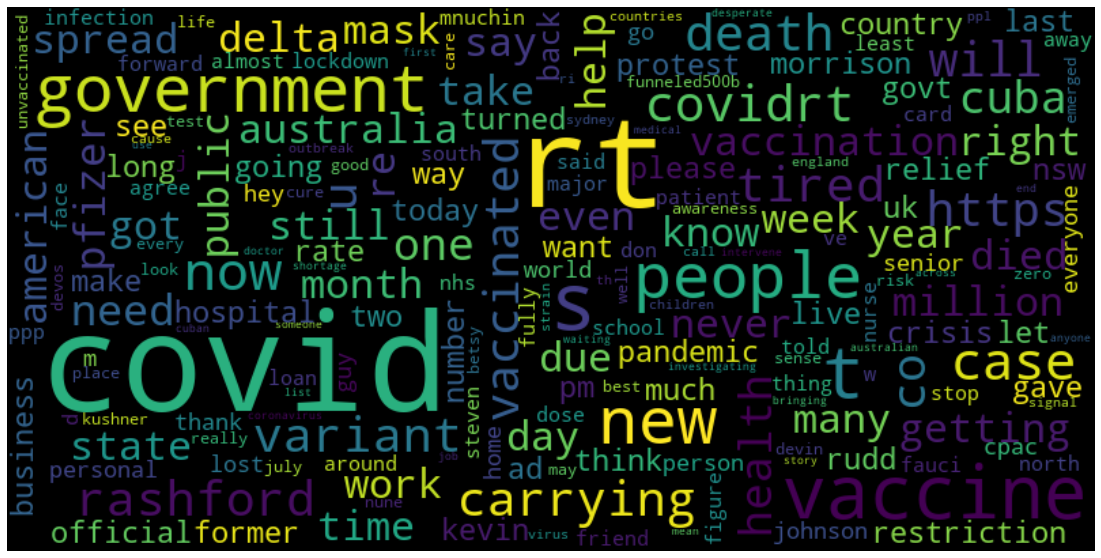

In [15]:
#generating a wordcloud of most used number word in the tweets. the more the number of word appears in the tweet the more the size of the word in wordcloud
plt.figure(figsize=(30,10))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')